# PyTorch Workflow
Let's explore an example PyTorch end-to-end workflow.

Reseources:
* Graound Truth Notebook - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb
* Book Version of Notebook - https://www.learnpytorch.io/01_pytorch_workflow/
* Aska Questions - https://github.com/mrdbourke/pytorch-deep-learning/discussions

In [1]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3: "fitting the model to data (training)",
                      4: "making prediction and evaluting a model (inference)",
                      5: "saving and losing a model",
                      6: "putting it all together"}
what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making prediction and evaluting a model (inference)',
 5: 'saving and losing a model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.4.1'

## 1. Data (preparing and loading)
Data Can be almost anything... in Machine learning.
* Excel speadsheet
* Image of any kind
* Videos (Youtube has lots of data...)
* Audio like songs or podcast
* DNA
* Text

Machine learning is game of two parts
1. Get data into a numerical representation.
2. Build a model toi learn patterns in that numerical representation.

To Showcase this, lets create some known data using the linear regression formula.

we'll use a linear regression formula to make a straight line with known **pramaters.**

In [3]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
x = torch.arange (start, end, step).unsqueeze (dim=1)
y = weight * x + bias
x[:10], y[:10], len(x), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

In [4]:
len (x), len (y)

(50, 50)

### Splitting data into training and test sets (one of the most important concept in machine learning in general)


In [5]:
# Create train/test split
train_split = int (0.8 * len(x))
x_train, y_train = x[:train_split], y[:train_split]
x_test, y_test = x[train_split:], y[train_split:]

len(x_train), len(y_train), len(x_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

This is where the data explorer's motto comes in!

"Visualize, Visualize, Visualize"

In [6]:
def plot_prediction (train_data = x_train,
                     train_labels = y_train,
                     test_data = x_test,
                     test_labels = y_test,
                     predictions = None):
    plt.figure(figsize = (10, 7))
    #plot training data in blue
    plt.scatter (train_data, train_labels, c= "b", s=4, label ="Training data")
    #Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label = "Testing data")
    #Are there predictions?
    if predictions is not None:
        #plot the predictions if they exixt
        plt.scatter(test_data, predictions, c="r", s=4, label= "Predictions")
        #show the legend 
        plt.legend(prop = {"size": 14});
    

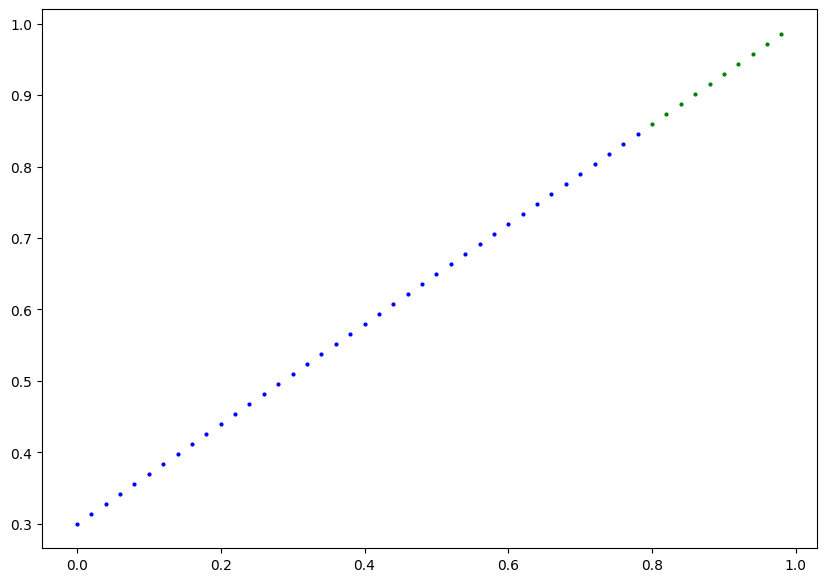

In [7]:
plot_prediction()

## 2. Building model
Our first PyTorch model!

This is very exciting .. lets do it!

Because we are going to be building classes throughout the course, So fetting familiar with OOP in Python, to do so we can use following reseourse from Real Python: https://realpython.com/python3-object-oriented-programming/

Two Main Algorithms:
1. Gradient descent: https://www.youtube.com/watch?v=IHZwWFHWa-w
2. Backpropagation: https://www.youtube.com/watch?v=Ilg3gGewQ5U


In [8]:
from torch import nn
#Create Linnear regression model class
class LinearRegressionModel (nn.Module): # <- almost everything in PyTorch inherhits from nn.Module
     def __init__(self):
        super().__init__()
        self.weights = nn.Parameter (torch.randn(1,
                                                  requires_grad = True,
                                                  dtype = torch.float))
          
        self.bias = nn.Parameter(torch.randn(1,
                                           requires_grad=True,
                                           dtype=torch.float))
   # Forward method to define the computation in the model
     def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
        return self.weights * x + self.bias #this is the linear regression formula
        

### PyTorch model vuilding essentials

* torch.nn - contains all of the buildings for computational graphs ( a neural network can be considered a computational graph)
* torch.nn.pramater - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module - The base class for all neural network modules, if you subclass it, you should overwrite forward ()
* torch.optim - this where the optimizers in PyTorch live, they will help with gradient descent
* def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation 

See more of these essential modules via the PyTorch cheatsheet - https://pytorch.org/tutorials/beginner/ptcheat.html

### Checking the contents of our PyTorch model

Now we've create a model, let's see what's inside...

So we can check our model parameters or whats inside our model using `.parameters().`

In [9]:
# Creating a random seed
torch.manual_seed(42)

#create an instance of the model(this is a subclass of nn.Module)

model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
#List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making prediction using `torch.inference_model()
To Check our model's predictive power, lets see how well it predicts `y_test` based on `x_test`

When we pass data through our model, it's going to rubn it through the `forward()` method.


In [11]:
y_preds = model_0 (x_test)
    
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [12]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_0 (x_test)
    
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [13]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

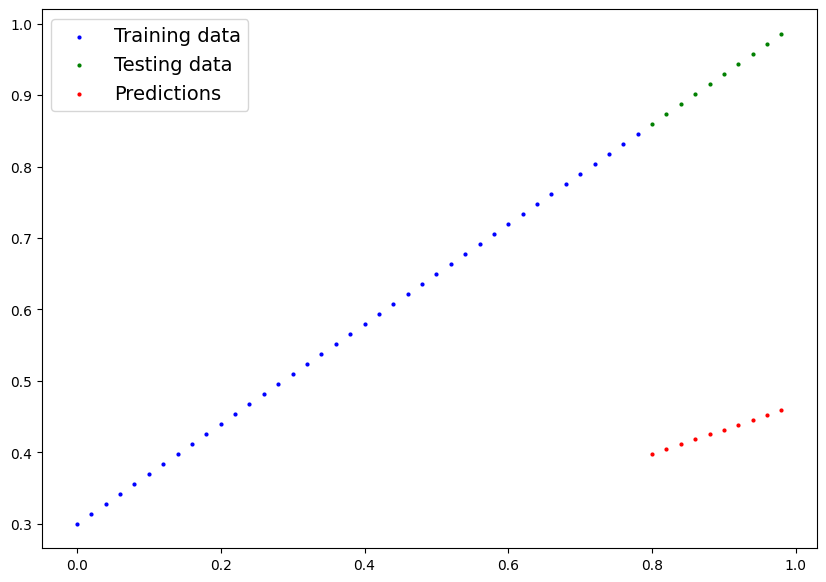

In [14]:
plot_prediction(predictions=y_preds)

### Train Model
The whole idea of training is for a model to move from some unknown parameters (these may be random) to some known parameters.

or in other words from a poor representation of the data to a better representation of the data.

One way to measure how wrong your models prediction are is to use a loss function.

* Note: Loss function may also be called cost function or criterion in different areas. for our case,we're going to refer to it as aloss function.

Things we need to train:

* Loss function to measure how wrong your model's predictions are to the ideal outputs,lower is better.
* Optimizer: Takes into account the loss of a model and adjust the model's parameters (e.g. weight & bias in our case) to improve the loss function.

And specifically for PyTorch, we need:

* A training loop
* A testing loop

In [15]:
list (model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [16]:
# Check out our model's parameters (a parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [17]:
# Setup a loss function
loss_fn = nn.L1Loss()

#Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(), #we want to optimize the parameters present in our model
                                                      lr= 0.01) #lr = learning rate = possibly the most important hyperameter you can set

**Q:** Which loss function and optimizer shopuld i use?
**A:** This will be problem specific. But with experience, you'll get and idea of what works and what doesn't with your particular problem set.

For example, for a regrassion problem (like ours), a loss function of `nn.L1Loss()` and an optimizer like `torch.optim.SGD()` will suffice.

But for a classificion problem like classfying wheather a photo is of a dog or cat, you'll likely want to use a loss function of `nn.BCELoss()` (binary cross entropy loss).

### Building a Training loop(and a testing loop) in PyTorch
A couple of things we need in a training loop:

0. Loop through the data
1. Forward pass (this involves data moving through our models's `forward()` functions) to make prediction on data - also called forward propagation
2. Calculate the loss (compare forward pass prediction to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backward through the network to calculate the gradients of the parameters of our model with respect to the loss (**backpropagation**)
5. Oprtimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient decent**)

In [18]:
torch.manual_seed(42)
# An epoch is one loop through the data... (this is a hyperparameter because we've set it pouseles)
epochs = 200

#Track different values
epoch_count = []
loss_values = []
test_loss_values = []

### Training
# 0. Loop Through the data
for epoch in range (epochs) :
    #set the model to training mode 
    model_0.train() #train mode in PyTorch sets all parameters that require gradients to require gradients
    
    # 1. Forward pass
    y_pred = model_0 (x_train)
    
    # 2. Calculate the loss
    loss = loss_fn (y_pred, y_train)
    #print(f"Loss: {loss}")
    
    # 3. Optimizer zero grad
    optimizer.zero_grad ()
    
    # 4. Perfrom backpropagation on the loss with respect to the parameters of the model
    loss.backward ()
    
    # 5. Step the optimizer (perform gradient descent)
    optimizer.step() # by default how the optimizer changes will acculumate through the loop so... we have to zero them above in step 3 for the next iteration of the loop
    
    ### Testing
    model_0.eval #turns off diffrent settings in the model not needed for evaluation/testing (dropout/BatchNorm layers)
    with torch.inference_mode(): # turns off gradient tracking & copule more things behind the scences 
        #with torch.no_grad (): #you may also see torch.no_gard() in older PyTorch code
        # 1. DO the forward pass
        test_pred = model_0(x_test)
        
        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)
        
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print (f"Epoch: {epoch} | Loss: {loss}  | Test loss: {test_loss}")
        # print out model state_dict()
        print(model_0.state_dict())

Epoch: 0 | Loss: 0.31288138031959534  | Test loss: 0.48106518387794495
OrderedDict({'weights': tensor([0.3406]), 'bias': tensor([0.1388])})
Epoch: 10 | Loss: 0.1976713240146637  | Test loss: 0.3463551998138428
OrderedDict({'weights': tensor([0.3796]), 'bias': tensor([0.2388])})
Epoch: 20 | Loss: 0.08908725529909134  | Test loss: 0.21729660034179688
OrderedDict({'weights': tensor([0.4184]), 'bias': tensor([0.3333])})
Epoch: 30 | Loss: 0.053148526698350906  | Test loss: 0.14464017748832703
OrderedDict({'weights': tensor([0.4512]), 'bias': tensor([0.3768])})
Epoch: 40 | Loss: 0.04543796554207802  | Test loss: 0.11360953003168106
OrderedDict({'weights': tensor([0.4748]), 'bias': tensor([0.3868])})
Epoch: 50 | Loss: 0.04167863354086876  | Test loss: 0.09919948130846024
OrderedDict({'weights': tensor([0.4938]), 'bias': tensor([0.3843])})
Epoch: 60 | Loss: 0.03818932920694351  | Test loss: 0.08886633068323135
OrderedDict({'weights': tensor([0.5116]), 'bias': tensor([0.3788])})
Epoch: 70 | Los

In [19]:
import numpy as np

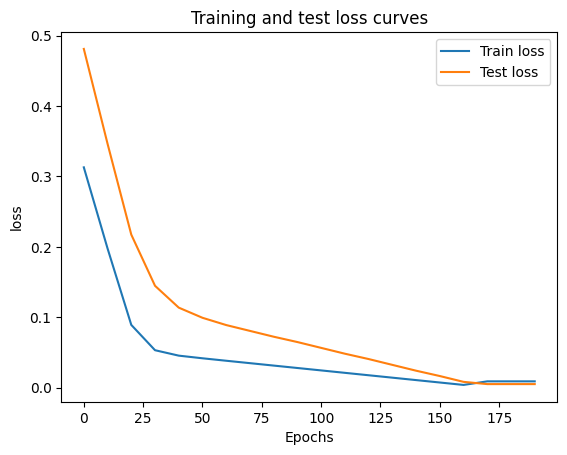

In [20]:
#plot the lose curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label = "Train loss")
plt.plot(epoch_count, test_loss_values, label = "Test loss")
plt.title("Training and test loss curves")
plt.ylabel("loss")
plt.xlabel("Epochs")
plt.legend();

In [21]:
with torch.inference_mode():
    y_preds_new = model_0 (x_test)

In [22]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [23]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [24]:
weight, bias

(0.7, 0.3)

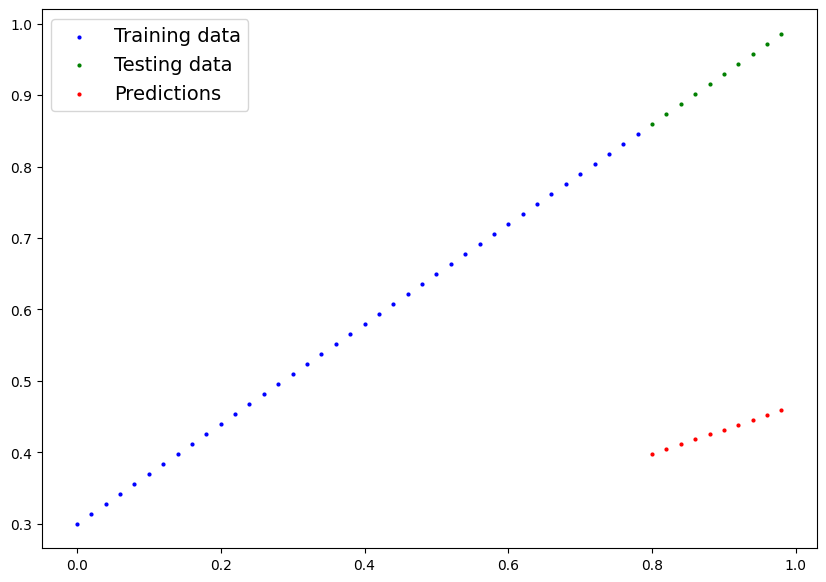

In [25]:
plot_prediction(predictions=y_preds);

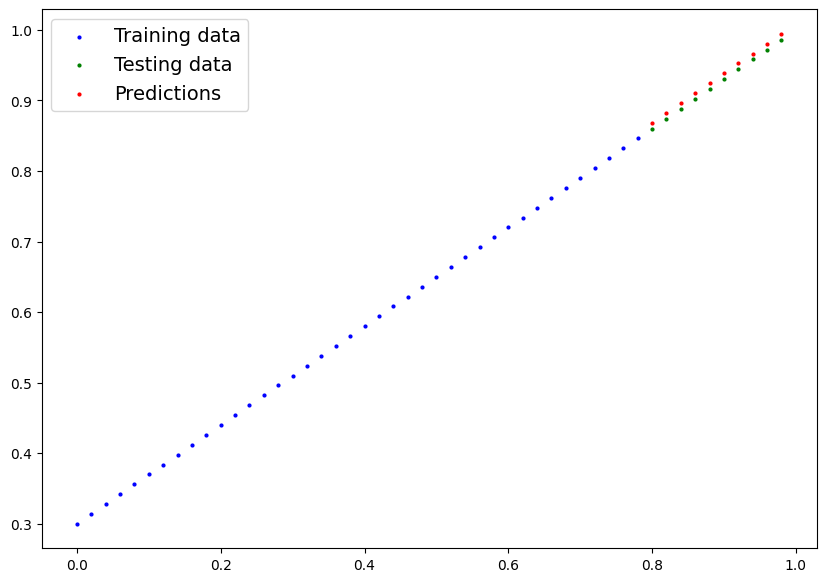

In [26]:
plot_prediction(predictions=y_preds_new);

### Saving a model in PyTorch

There are three main methods you should know about for saving and loading models PyTorch.

1. `torch.save()` - allows you save a PyTorch object in Python's pickle format
2. `torch.load()`- allows you load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()`- this allows to load a model's saved state dictionary

PyTorch save and load code tutorial + extra-curriculum - https://pytorch.org/tutorials/beginner/saving_loading_models.html

In [27]:
# Saving our PyTorch model
#from pathlib import path

# 1. Create models directory
#MODEL_PATH = Path ("Models")
#MODEL_PATH.mkdir(parents=True, exist_ok=True)

#2. Create model save path

#MODEL_NAME = "01.pytorch_workflow_model_0.pth"
#MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#3. Save the model state dict

#print (f"saving model to： {MODEL_SAVE_PATH}")
#torch.save(obj=model_0.state_dict(),
           #f=MODEL_SAVE_PATH)
 